# Requirements

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
for file in os.listdir(r'tennis_csv'):
    df_name = file.split('.')[0]
    globals()[df_name] = pd.read_csv(r'tennis_csv/' + file)

ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['df_power.csv', 'df_round.csv', 'df_season.csv', 'df_statistics.csv', 'df_time.csv', 'df_tournament.csv', 'df_venue.csv', 'df_votes.csv', 'df_away_team.csv', 'df_away_team_score.csv', 'df_event.csv', 'df_home_team.csv', 'df_home_team_score.csv', 'df_odds.csv', 'df_pbp.csv']

# Creative questions

### 1. The least risky matchs to bet on
### 2. Which physical factor has the greatest impact on the service score
### 3. Calculate the win-loss ratio for each player
### 4. How did the winners of the game get the most points?
### 5. Does being from the same country as the player and the tournament affect the player's win?
### 6. assuming that votes table are fan's predictions it has affect the player's win ?
### 7. what is the corrolation between votes and bet on players
### 8. wich seed has most win ?
### 9. wich player got the most points ?
### 10. is any corrolation between first serve and winning ?
### 11. wich season has players with high rank ?
### 12. whch catagory of statitics has most affect to winning ?
### 13.* countries with most wins 
### 14.* countries with most players
### 15.* countries with most hight rank players

<hr style="border:8px solid gray">

In [3]:
match_win_month = df_event[['match_id', 'winner_code', 'start_datetime']]
match_win_month['start_datetime'] = pd.to_datetime(match_win_month['start_datetime'], unit='s')
match_win_month['month'] = match_win_month['start_datetime'].dt.month
match_win_month.drop(columns=['start_datetime'], inplace=True)
match_win_month.dropna().shape
match_h_player = df_home_team[['match_id', 'name']].drop_duplicates()
match_a_player = df_away_team[['match_id', 'name']].drop_duplicates()
win_h_player = pd.merge(match_win_month.loc[match_win_month['winner_code'] == 1], match_h_player, on='match_id')
win_h_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
win_h_player.dropna(inplace = True)
win_a_player = pd.merge(match_win_month.loc[match_win_month['winner_code'] == 2], match_a_player, on='match_id')
win_a_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
win_a_player.dropna(inplace = True)
winners_name = pd.concat([win_h_player, win_a_player], axis = 0, ignore_index = True)

C:\Users\arian\AppData\Local\Temp\ipykernel_18520\1004059285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_win_month['start_datetime'] = pd.to_datetime(match_win_month['start_datetime'], unit='s')
C:\Users\arian\AppData\Local\Temp\ipykernel_18520\1004059285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_win_month['month'] = match_win_month['start_datetime'].dt.month
C:\Users\arian\AppData\Local\Temp\ipykernel_18520\1004059285.py:4: SettingWithCopyWarning: 
A value is trying to be set 

## 1. The least risky matchs to bet on

In [4]:
df_odds.dropna(axis='rows', inplace=True)
df_odds.drop(columns='is_live', inplace=True)
df_odds.drop(columns='suspended', inplace=True)

In [5]:
df_odds['fractional_value'] = df_odds['fractional_value'].replace('1/', '1')
df_odds['fractional_value'] = df_odds['fractional_value'].replace('13/', '1/3')
df_odds['fractional_value'] = df_odds['fractional_value'].replace('4/', '3/4')

In [6]:
df_odds['fractional_value'] = df_odds['fractional_value'].apply(lambda x: eval(x) if '/' in x else float(x))

In [7]:
match_fraction_win = df_odds[['match_id','market_name', 'choice_name', 'fractional_value', 'winnig']]
match_wname_wcode = winners_name[['match_id', 'name', 'winner_code']].rename(columns={'name' : 'winner_name'})
wname_fraction = pd.merge(match_fraction_win, match_wname_wcode, on='match_id')

In [8]:
wname_fraction.loc[wname_fraction['winnig'] == True]

,match_id,market_name,choice_name,fractional_value,winnig,winner_name,winner_code
1,11673958,full_time,2,0.830000,True,Tirante T.,2.0
3,11673958,first_set_winner,2,0.833333,True,Tirante T.,2.0
5,11673958,total_games_won,Under,0.909091,True,Tirante T.,2.0
6,11673962,full_time,1,0.500000,True,Tirante T.,1.0
8,11673963,full_time,1,0.360000,True,Heide G.,1.0
...,...,...,...,...,...,...,...
770,11703442,full_time,1,0.083333,True,Tessa L.,1.0
773,11703443,full_time,2,0.727273,True,Kalina V.,2.0
774,11703445,full_time,1,0.833333,True,Maute J.,1.0
776,11703470,full_time,1,0.666667,True,Grey S.,1.0


In [9]:
wname_fraction.groupby('winner_name').agg({'fractional_value' : 'mean'})

,fractional_value
winner_name,
Agamenone F.,0.882626
Alcaraz C.,1.918089
Alves M.,8.002500
Amariei I.,4.252500
Ambrogi L.,0.907692
...,...
Zormann M.,3.775000
Zverev A.,0.987549
de Bakker T.,1.500000


<hr style="border:8px solid gray">

## 2. Which physical factor has the greatest impact on the service score

## 3. Calculate the win-loss ratio for each player

In [23]:
loser_h_player = pd.merge(match_win_month.loc[match_win_month['winner_code'] == 2], match_h_player, on='match_id')
loser_h_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
loser_h_player.dropna(inplace = True)
loser_a_player = pd.merge(match_win_month.loc[match_win_month['winner_code'] == 1], match_a_player, on='match_id')
loser_a_player.drop_duplicates(subset = ['match_id'], keep = 'first', inplace = True)
loser_a_player.dropna(inplace = True)
losers_name = pd.concat([loser_h_player, loser_a_player], axis = 0, ignore_index = True)

In [24]:
winners_name

,match_id,winner_code,month,name
0,11673962,1.0,10,Tirante T.
1,11673963,1.0,9,Heide G.
2,11674008,1.0,9,Shelbayh A.
3,11674032,1.0,10,Machač T.
4,11674034,1.0,9,Draper J.
...,...,...,...,...
497,11702232,2.0,10,Aguilar Cardozo J.
498,11702238,2.0,10,Derdoy F.
499,11702243,2.0,10,Mouilleron Salvo M.
500,11702248,2.0,10,Noel M.


In [25]:
win_count = winners_name.groupby('name', as_index=False).agg({'match_id' : 'count'}).sort_values(by=['match_id'], ascending=False).rename(columns={'match_id' : 'win_count'})

In [26]:

winners_name['name'].duplicated().sum(), losers_name['name'].duplicated().sum()

(130, 0)

<hr style="border:8px solid gray">

## 5. Does being from the same country as the player and the tournament affect the player's win?

 <span style="color:#728C69 ; font-family:Times new roman ; font-size: 2em ;">extract country of players</span>

In [27]:
home_player_contry = df_home_team[['match_id', 'name', 'birthplace']]
country = home_player_contry['birthplace'].str.split(',').str[-1]
home_player_contry = pd.concat([home_player_contry, country], axis=1)
home_player_contry.columns = ['match_id', 'name', 'birthplace', 'country']
home_player_contry.drop(columns='birthplace', inplace=True)
home_player_contry.dropna(inplace=True)

In [28]:
away_player_contry = df_away_team[['match_id', 'name', 'birthplace']]
country = away_player_contry['birthplace'].str.split(',').str[-1]
away_player_contry = pd.concat([away_player_contry, country], axis=1)
away_player_contry.columns = ['match_id', 'name', 'birthplace', 'country']
away_player_contry.drop(columns='birthplace', inplace=True)
away_player_contry.dropna(inplace=True)

In [29]:
players_country = pd.concat([away_player_contry, home_player_contry])

<span style="color:#728C69 ; font-family:Times new roman ; font-size: 2em ;">extraxt The country of the match</span>

In [30]:
match_country = df_venue[['match_id', 'country']].dropna().rename(columns={'country' : 'match_country'})

<span style="color:#728C69 ; font-family:Times new roman ; font-size: 2em ;">compare birth country and match's country</span>

In [31]:
countries = match_country.merge(players_country, on='match_id', how='left')

In [32]:
winners_countries = countries.merge(winners_name[['match_id', 'name']], on='match_id')
winners_countries['match_country'].astype('str').iloc[15] == winners_countries['country'].astype('str').iloc[15]

False

In [33]:
winners_countries['match_country'] = winners_countries['match_country'].str.strip()
winners_countries['country'] = winners_countries['country'].str.strip()

In [34]:
same_countries = (winners_countries[(winners_countries['match_country'] == winners_countries['country'])
                                    & (winners_countries['name_x'] == winners_countries['name_y']) ].reset_index().drop(columns='index'))
home_country_winners = (same_countries.groupby('name_x').agg({'country' : 'count'})
                        .sort_values(by=['country'], ascending=False).reset_index().rename(columns={'name_x' : 'name'}))

In [35]:
home_status = home_country_winners.merge(win_count[['name', 'win_count']], on='name')

In [36]:
lose_count = losers_name.groupby('name').agg({'match_id' : 'count'}).rename(columns= {'match_id' : 'lose_count'})

In [37]:
games = home_status.merge(lose_count, on='name', how='left')
games.fillna(0, inplace=True)
games['game_count'] = games['win_count'] + games['lose_count']

In [109]:
games

,name,country,win_count,lose_count,game_count
0,Pereira J.,2,2,0.0,2.0
1,Ratti L.,2,2,0.0,2.0
2,Dutra Da Silva D.,2,2,0.0,2.0
3,Fery A.,2,2,0.0,2.0
4,Townsend T.,2,2,0.0,2.0
5,Tenti F.,2,2,0.0,2.0
6,Sakamoto P.,2,2,0.0,2.0
7,Zormann M.,1,1,0.0,1.0
8,Zhu E.,1,1,0.0,1.0
9,Wang Xin.,1,1,0.0,1.0


In [54]:
df_power.groupby('match_id').agg({'set_num' : 'max'}).mean()

set_num    2.185393
dtype: float64

### 6. assuming that votes table are fan's predictions it has affect the player's win ?

In [62]:
vote_status = winners_name.merge(df_votes[['match_id', 'home_vote', 'away_vote']], on='match_id', how='left')
vote_infavor = vote_status[((vote_status['home_vote'] > vote_status['away_vote']) & (vote_status['winner_code'] == 1)) | ((vote_status['home_vote'] < vote_status['away_vote']) & (vote_status['winner_code'] == 2))]['match_id'].count()
vote_against = vote_status[((vote_status['home_vote'] > vote_status['away_vote']) & (vote_status['winner_code'] == 2)) | ((vote_status['home_vote'] < vote_status['away_vote']) & (vote_status['winner_code'] == 1))]['match_id'].count()

In [63]:
vote_infavor

348

In [64]:
vote_against

134

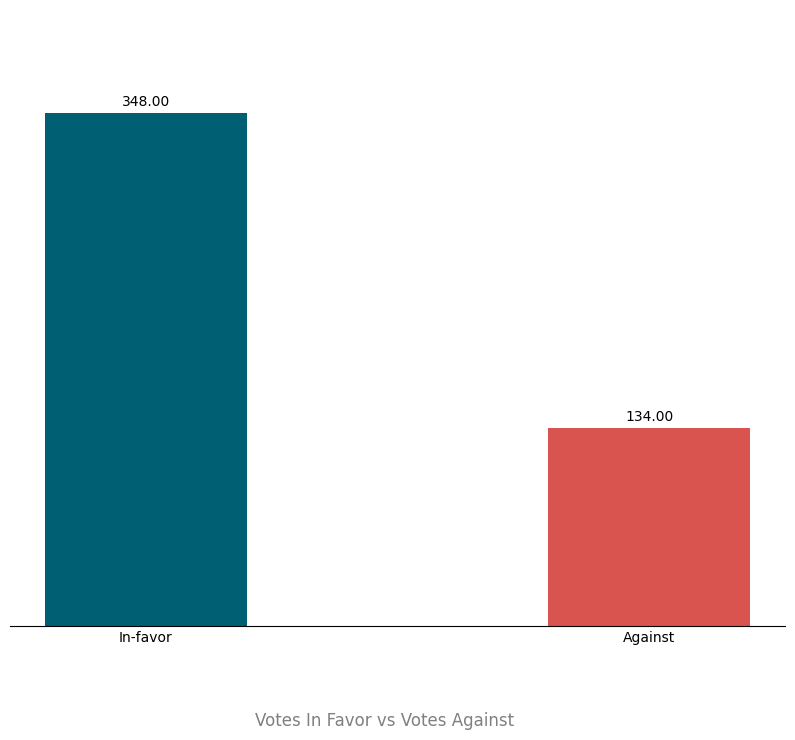

In [73]:
fig, ax = plt.subplots(figsize=(10, 8))
categories = ['In-favor', 'Against']
bars = ax.bar(categories, [vote_infavor, vote_against], width=0.4, color=['#005f73', '#d9534f'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
ax.set_ylim(0, max([vote_infavor, vote_against]) * 1.2)  # Set y-axis limit to make room for labels
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
# ax.grid(axis='y', color='lightgray', alpha=0.5, linestyle='--')
fig.text(0.5, -0.02, 'Votes In Favor vs Votes Against', ha='center', va='bottom', color='gray', fontsize=12)   

plt.show()

In [44]:
vote_status

,match_id,winner_code,month,name,home_vote,away_vote
0,11673962,1.0,10,Tirante T.,909,213
1,11673963,1.0,9,Heide G.,399,213
2,11674008,1.0,9,Shelbayh A.,245,594
3,11674032,1.0,10,Machač T.,354,1127
4,11674034,1.0,9,Draper J.,836,380
...,...,...,...,...,...,...
497,11702232,2.0,10,Aguilar Cardozo J.,0,5
498,11702238,2.0,10,Derdoy F.,3,3
499,11702243,2.0,10,Mouilleron Salvo M.,2,3
500,11702248,2.0,10,Noel M.,26,10


### 7. what is the corrolation between votes and bet on players

### 8. wich seed has most win ?

### 9. wich player got the most points ?


In [75]:
df_home_team_score

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,0.0,0.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11673962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11673963,2.0,2.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11673993,1.0,1.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11674000,0.0,0.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,11703444,2.0,2.0,7.0,6.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
760,11703445,2.0,2.0,7.0,6.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
761,11703470,2.0,2.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,11703524,2.0,2.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_away_team_score

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,2.0,2.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11673962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11673963,0.0,0.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11673993,2.0,2.0,4.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11674000,1.0,1.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,11703444,0.0,0.0,6.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
760,11703445,0.0,0.0,6.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
761,11703470,0.0,0.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,11703524,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_pbp[df_pbp['match_id'] == 11674074].iloc[0:10]

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11674074,2,7,0,0,15,2,5,1,6,1,1,1
1,11674074,2,7,1,0,30,0,5,1,6,1,1,1
2,11674074,2,7,2,15,30,1,1,5,6,1,1,1
3,11674074,2,7,3,30,30,0,1,5,6,1,1,1
4,11674074,2,7,4,40,30,0,3,5,6,1,1,1
5,11674074,2,7,5,40,40,0,5,1,6,1,1,1
6,11674074,2,7,6,A,40,0,3,5,6,1,1,1
7,11674074,2,7,7,40,40,0,5,1,6,1,1,1
8,11674074,2,7,8,A,40,0,3,5,6,1,1,1
9,11674074,2,6,0,15,0,0,1,5,5,1,2,1


### 11. wich season has players with high rank ?

In [86]:
df_home_ranking

,match_id,name,current_rank
0,11673958,Barrios Vera T.,103.0
1,11673962,Tirante T.,123.0
2,11673963,Heide G.,247.0
3,11673993,Ajduković D.,143.0
4,11674000,Escobedo E.,404.0
...,...,...,...
431,11703443,Salazar D.,1338.0
432,11703445,Maute J.,1191.0
433,11703470,Grey S.,432.0
434,11703524,Panaras A.,1408.0


In [89]:
df_home_ranking = df_home_team[['match_id', 'name', 'current_rank']]
df_away_ranking = df_away_team[['match_id', 'name', 'current_rank']]

ranking = pd.concat([df_home_ranking, df_away_ranking], ignore_index=True)
clean_ranking = ranking.drop_duplicates(subset='name')

In [97]:
season_ranking = clean_ranking.merge(df_season[['match_id', 'season_id', 'name']], on='match_id', how='left')
season_ranking

,match_id,name_x,current_rank,season_id,name_y
0,11673958,Barrios Vera T.,103.0,52736,"ATP Challenger Bogota, Colombia Men Singles 2023"
1,11673962,Tirante T.,123.0,52736,"ATP Challenger Bogota, Colombia Men Singles 2023"
2,11673963,Heide G.,247.0,52736,"ATP Challenger Bogota, Colombia Men Singles 2023"
3,11673993,Ajduković D.,143.0,53163,"ATP Challenger Braga, Portugal Men Singles 2023"
4,11674000,Escobedo E.,404.0,52758,"ATP Challenger Charleston, SC, USA Men Singles..."
...,...,...,...,...,...
591,11701761,Trotter J.,461.0,53750,"ATP Challenger Tiburon, USA Men Singles 2023"
592,11701779,Wagner S.,560.0,55245,"ITF France 20A, Women Singles 2023"
593,11701782,Zaar L.,740.0,55245,"ITF France 20A, Women Singles 2023"
594,11701785,Lopatetska D.,863.0,55245,"ITF France 20A, Women Singles 2023"


In [108]:
best_ranking = season_ranking.groupby('name_y').agg({
    'current_rank': 'sum'
}).sort_values(by='current_rank')

best_ranking

,current_rank
name_y,
"WTA Tokyo, Japan Women Singles 2023",24.0
"ATP Beijing, China Men Singles 2023",218.0
"ATP Challenger Orleans, France Men Singles 2023",305.0
"ATP Challenger Braga, Portugal Men Singles 2023",356.0
"ITF Serbia 17A, Women Singles 2023",490.0
"ATP Astana, Kazakhstan Men Singles 2023",501.0
"2023 ITF Serbia F19, Men Singles",596.0
"ITF USA 42A, Women Singles 2023",609.0
"ITF Italy 02B, Women Singles 2023",650.0


* Presentation
* Notebook
* StoryTelling